# Task_1

Made by: Anton Beny M S

In this notebook, we are going to understand Data Visualization using mathematical models.

Firstly, we are going to import our necessary libraries and configure them.

In [1]:
import statistics

#!pip install lets-plot -U
import lets_plot as lplt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('dark_background')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 5.9 MB/s eta 0:00:00


## Data

Now we are going to import pre-existing data in the form of a .csv file.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/r3kste/AIC/main/Task_1/data/data.csv')
data

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1. 6,Female,Bachelors,27,4,25535,2%,Divorced,West,Issues with the Manager
1,2,XYZ2490,ABC2,5-Jul-10,Technical Services Officer,M2,Yes,Jayanagar,6-Apr-12,1. 9,Male,MBA,36,2,52155,45%,Single,South,More Challenging Job Roles/ Higher designation
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,7-Apr-12,1. 5,Male,Bachelors,24,4,26438,18%,Divorced,CENTRAL,Issues with the Manager
3,4,XYZ1679,ABC4,1 May 08,AM - Sales,M1,Yes,Admin Gujarat,3 Apr 12,3 .11,Male,Bachelors,33,2,54311,82%,Single,West,Lack of Growth
4,5,XYZ2378,ABC5,3 Mar 10,Sales Executive,E1,Yes,Jagdishpuram,10 Apr 12,2 .1,Male,Bachelors,24,4,26702,49%,Divorced,North,Issues with the Manager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,323,XYZ1538,ABC323,26-May-08,AM - Sales,M1,Yes,Guntur,15 Mar 13,4 .9,Male,Bachelors,37,2,53841,69%,Divorced,South,Lack of Growth
323,324,XYZ3221,ABC324,13-Sep-12,Sales Executive,E1,Yes,Guntur,7 Mar 13,0. 5,Male,Bachelors,25,3,25813,11%,Married,South,Lack of Growth
324,325,XYZ0207,ABC325,12-Dec-05,Sr Sales Executive,E2,Yes,Guntur,12 Mar 13,7 .3,Male,Bachelors,28,1,36498,11%,Divorced,South,Lack of Growth
325,326,XYZ0183,ABC326,21-Jul-04,AM - Sales,M1,Yes,Guntur,31 Mar 13,8 .8,Male,Bachelors,36,3,51796,82%,Divorced,South,Termination - Poor Performance


Now, that we have our data, lets see some of its statistics

In [3]:
data.describe()

,S.No,Age,Last Rating,Monthly Income
count,327.000000,327.000000,327.000000,327.000000
mean,164.000000,28.541284,3.229358,32592.948012
std,94.540996,5.048596,1.038814,15995.368859
min,1.000000,24.000000,1.000000,25010.000000
25%,82.500000,25.000000,2.000000,25704.500000
50%,164.000000,27.000000,3.000000,26389.000000
75%,245.500000,28.500000,4.000000,31916.000000
max,327.000000,54.000000,5.000000,233954.000000


### Inferences
* The 75th percentile of **Age** is 28.5. This means that 75% of the total employees who left are within the age group 24-28.

## Distribution of Employees

Now, let us first know about the distribution of the employees.

In [4]:
lplt.ggplot(data) + lplt.geom_point(lplt.aes(x="Education", y="Age", color="Gender")) + lplt.flavor_high_contrast_dark()

In [5]:
#Frequency Table of Some Fields

n_male = len(data.loc[data['Gender'] == 'Male'])
n_female = len(data.loc[data['Gender'] == 'Female'])

n_bach = len(data.loc[data['Education'] == 'Bachelors'])
n_mba = len(data.loc[data['Education'] == 'MBA'])

print('Number of:\n\nMale:', n_male, '\nFemale:', n_female, '\n\nBachelors:', n_bach, '\nMBA:', n_mba)

Number of:

Male: 309 
Female: 18 

Bachelors: 309 
MBA: 18


### Inferences
* Male to Female Ratio is around: 17:1 which is (coincidentally) exactly equal to the Ratio of People having Bachelors Degree to those having a MBA Degree
* It is clear, that the younger employees, from the ages of 24 to 35, only had a Bachelor's Degree

## Age of Employees

Now, lets visualize our data, in terms of the employees' age.

In [6]:
#Ages
age = list(set(sorted(data['Age'])))
print('Age:\t', age)

#Frequency Table of Ages
c_age = np.array(data.groupby('Age').size())
print('c_Age:\t', c_age)

Age:	 [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 54]
c_Age:	 [55 35 45 54 56  4  9  6  2  6  3 15  5  7  2  6  4  3  2  1  2  4  1]


Now, lets plot a bar graph between Age and Frequency, to further understand the distribution of the employees.

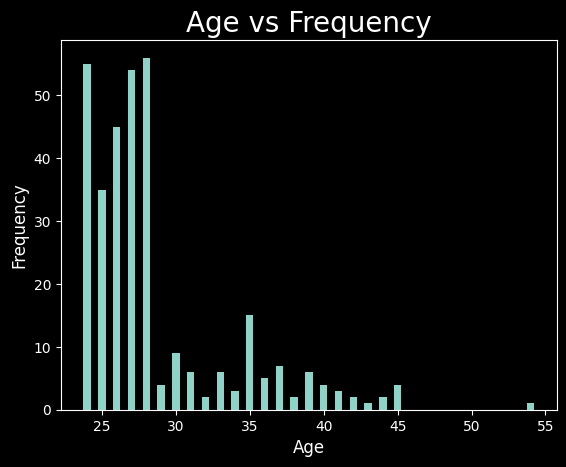

In [7]:
fig, ax = plt.subplots()
ax.set_title('Age vs Frequency', fontsize=20)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

plt.bar(age, c_age, width=0.5)
plt.show()

### Inferences

* As mentioned earlier, it is evident that most of the employees who left are within the age group from 24 to 28.
* After Age 28, as we move along the x-axis, the Age increases, however, the number of employees leaving keep fluctuating, but nevertheless, does not come close to those from 24-28.

## Reasons for Leaving

Now, lets try to find out the major reasons why these people left their jobs.<br><br>
We will split the population into two groups: <br>
*Group One:* consisting the Age group 24 to 28. <br>
*Group Two:* the other, consists the Ages 29 and above.

In [8]:
#Group1
data1 = data.loc[data['Age'] < 29]
data1 = data1.sort_values(['Remarks'], ascending=True)
data1.sort_values(['S.No'], ascending=True)

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1. 6,Female,Bachelors,27,4,25535,2%,Divorced,West,Issues with the Manager
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,7-Apr-12,1. 5,Male,Bachelors,24,4,26438,18%,Divorced,CENTRAL,Issues with the Manager
4,5,XYZ2378,ABC5,3 Mar 10,Sales Executive,E1,Yes,Jagdishpuram,10 Apr 12,2 .1,Male,Bachelors,24,4,26702,49%,Divorced,North,Issues with the Manager
5,6,XYZ3009,ABC6,17 Nov 11,Sales Executive,E1,Yes,Lalganj,9 Apr 12,0. 4,Male,Bachelors,26,4,26291,81%,Single,North,Better Salary
6,7,XYZ2783,ABC7,7 Feb 11,Sales Executive,E1,Yes,Trombay,9 Apr 12,1. 2,Male,Bachelors,24,2,26663,2%,Divorced,West,Lack of Growth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,321,XYZ3106,ABC321,6-Apr-12,Sales Executive,E1,Yes,Bachrawan,16 Mar 13,0. 11,Male,Bachelors,25,4,26671,51%,Married,North,Issues with the Manager
321,322,XYZ3159,ABC322,18-Jun-12,Sales Executive,E1,Yes,Jagdishpuram,2 Mar 13,0. 8,Male,Bachelors,28,4,25775,13%,Married,North,Lack of Growth
323,324,XYZ3221,ABC324,13-Sep-12,Sales Executive,E1,Yes,Guntur,7 Mar 13,0. 5,Male,Bachelors,25,3,25813,11%,Married,South,Lack of Growth
324,325,XYZ0207,ABC325,12-Dec-05,Sr Sales Executive,E2,Yes,Guntur,12 Mar 13,7 .3,Male,Bachelors,28,1,36498,11%,Divorced,South,Lack of Growth


In [9]:
#Group2
data2 = data.loc[data['Age'] > 28]
data2 = data2.sort_values(['Remarks'], ascending=True)
data2.sort_values(['S.No'], ascending=True)

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
1,2,XYZ2490,ABC2,5-Jul-10,Technical Services Officer,M2,Yes,Jayanagar,6-Apr-12,1. 9,Male,MBA,36,2,52155,45%,Single,South,More Challenging Job Roles/ Higher designation
3,4,XYZ1679,ABC4,1 May 08,AM - Sales,M1,Yes,Admin Gujarat,3 Apr 12,3 .11,Male,Bachelors,33,2,54311,82%,Single,West,Lack of Growth
16,17,XYZ3036,ABC17,20-Jan-12,Technical Services Officer,M2,Yes,Dehradun,5-Apr-12,0. 2,Male,MBA,39,3,54087,45%,Single,North,Better Salary
21,22,XYZ1916,ABC22,14-Nov-08,Sr Sales Executive,E2,Yes,Balasore,10-Apr-12,3 .4,Male,Bachelors,32,4,30041,39%,Married,East,Lack of Growth
26,27,XYZ1507,ABC27,12-May-08,Sr Sales Executive,E2,Yes,ZO Kolkata,30 Apr 12,3 .11,Male,Bachelors,33,4,32527,13%,Single,East,Lack of Growth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,317,XYZ2003,ABC317,18-Dec-08,Sr Sales Executive,E2,Yes,Rajkot,15 Mar 13,4 .2,Male,Bachelors,35,3,33922,31%,Single,West,Health Reasons
317,318,XYZ1306,ABC318,5-Jan-08,AM - Sales,M1,Yes,Kotra,31 Mar 13,5 .2,Male,Bachelors,33,2,54517,94%,Divorced,Central,Lack of Growth
318,319,XYZ1912,ABC319,25-Nov-08,Sr Sales Executive,E2,Yes,Amritsar,22 Mar 13,4 .3,Male,Bachelors,30,3,34250,36%,Married,North,Lack of Growth
322,323,XYZ1538,ABC323,26-May-08,AM - Sales,M1,Yes,Guntur,15 Mar 13,4 .9,Male,Bachelors,37,2,53841,69%,Divorced,South,Lack of Growth


In [10]:
#List of possible reasons for leaving the company
remarks = sorted(list(set(data['Remarks'][:])))
print(remarks)

['Absconding', 'Better Salary', 'Health Reasons', 'Higher education', 'Issues with the Manager', 'Lack of Growth', 'More Challenging Job Roles/ Higher designation', 'Reasons not known', 'Termination - Poor Performance', 'Termination - Theft']


In [11]:
# Finding the frequency of each Remark, and storing it

c_remarks = np.array(data.groupby('Remarks').size())  # Overall
print("c_remarks:\t", c_remarks)

c_remarks1 = np.array(data1.groupby('Remarks').size())  # Group One
print("c_remarks1:\t", c_remarks1)

c_remarks2 = np.subtract(c_remarks, c_remarks1)  # Group Two
print("c_remarks2:\t", c_remarks2)

c_remarks:	 [  8  19   4   3 145  96  31   2  13   6]
c_remarks1:	 [  8  13   2   3 132  66   3   2  11   5]
c_remarks2:	 [ 0  6  2  0 13 30 28  0  2  1]


Now, lets plot the above data as a bar graph.

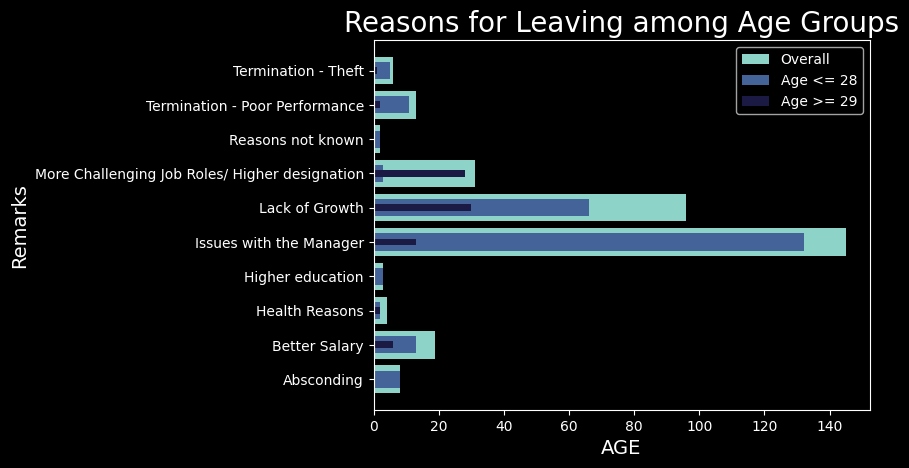

In [12]:
fig, ax = plt.subplots()
ax.set_title("Reasons for Leaving among Age Groups", fontsize=20)
ax.set_xlabel("AGE", fontsize=14)
ax.set_ylabel("Remarks", fontsize=14)

plt.barh(remarks, c_remarks, height=0.8, label='Overall')  # Overall
plt.barh(remarks, c_remarks1, height=0.5, label='Age <= 28', color='#446399')  # Group One
plt.barh(remarks, c_remarks2, height=0.2, label='Age >= 29', color='#1a1a44')  # Group Two

plt.legend()
plt.show()

## Inferences

#### Overall
* The major reason for Leaving the Job seems to be **"Issues with the Manager"**, which is closely followed by the employees remarking that they left because of their "Lack of Growth".
* The next major reason is **"More Challenging Job Roles/Higher designation"**, followed by "Better Salary".
* The other reasons are seemingly less significant.
* Most of these can be explained in terms of work experience and environment.


#### Group One
* For Group One, the major reason is **"Issues with the Manager"**, which is closely followed by "Lack of Growth". This is similar to the overall demographic as well.
* For Group One, the other reasons are not as significant as the first two.
* It is evident that Group One is the major faction among the people who left due to **"Issues with the Manager"**.
* This is understandable given that these are the younger employees, with little to no previous experience, and desire to attain their maximum possible potential and growth.
                                                                                    
#### Group Two
* For Group Two, the major reason is **"Lack of Growth"** which is closely followed by **"More Challenging Job Roles/Higher designation"**.
* Unlike Group One, much fewer individuals from Group Two reported **"Issues with the Manager"**.
* It is clear that Group Two individuals the major faction among those who left for a **"More Challenging Job Roles/Higher designation"**.
* Once again, this is understandable, considering that Group Two is the more experienced set of employees, who understand the work environment, and looking for better roles.
* There are little to zero employees in Group Two, who left for these following reasons: **"Termination - Theft"**, **"Termination - Poor Performance"**, **"Higher Education"** and **"Absconding"**

## Monthly Income

Now, lets look at one of the more important data, which is the **Monthly Income**.

In [13]:
# List to store average monthly income of people of various age groups.
minco0 = []
for i in list(set(age)):
    temp = data.loc[data['Age'] == i, 'Monthly Income']
    minco0.append(np.mean(temp))

pd.DataFrame(list(zip(age, minco0)), columns=['Age', 'Average Monthly Income'])

,Age,Average Monthly Income
0,24,26020.509091
1,25,26092.371429
2,26,25946.044444
3,27,26384.425926
4,28,27382.285714
5,29,34428.750000
6,30,38653.666667
7,31,40005.000000
8,32,40085.000000
9,33,46256.166667


Now, let us plot a bar graph of Age vs Monthly Income

In [14]:
lplt.ggplot(data) + lplt.geom_point(
    lplt.aes(color="Education", y="Monthly Income", x="Age")) + lplt.flavor_high_contrast_dark()

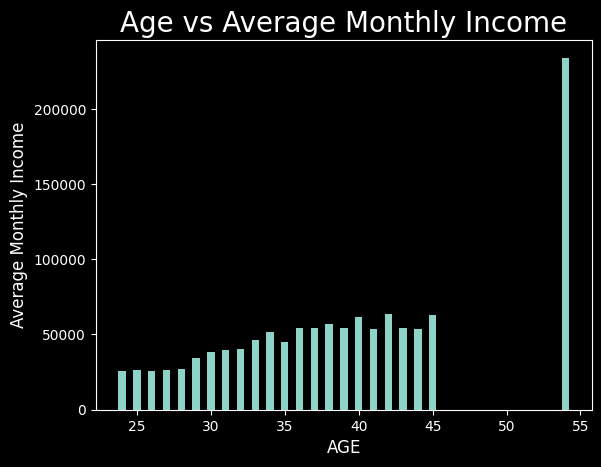

In [15]:
fig, ax = plt.subplots()
ax.set_title("Age vs Average Monthly Income", fontsize=20)
ax.set_xlabel("AGE", fontsize=12)
ax.set_ylabel("Average Monthly Income", fontsize=12)

plt.bar(age, minco0, width=0.5)
plt.show()

Now, it is clear that **ABC197**, the **"CXO"** is an outlier, with an Average Monthly Income of 2.3 L, and is skewing our data. So let us remove this entry for now.

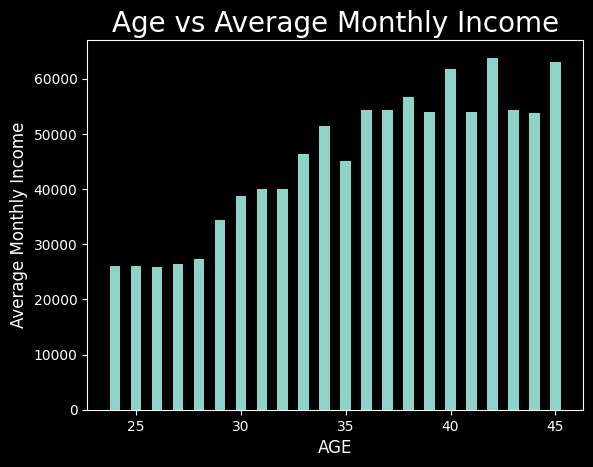

In [16]:
fig, ax = plt.subplots()
ax.set_title("Age vs Average Monthly Income", fontsize=20)
ax.set_xlabel("AGE", fontsize=12)
ax.set_ylabel("Average Monthly Income", fontsize=12)

cp_age = [x for x in age if x != age[-1]]
cp_minco0 = [x for x in minco0 if x != minco0[-1]]

plt.bar(cp_age, cp_minco0, width=0.5)
plt.show()

This is much better...
             
### Inferences

* Correlation between Age and Salary:<br>It is clear that in Group One, that is from ages 24 to 28, there is little to zero correlation between age and salary, that is, the average income doesn't change with change in Age.<br>However, from ages 29 and above, that is Group Two, there is a strong correlation between these two, that is, average income increases with increase in Age.

## Grades and Designation

Now, let us explore a bit on the side of **Grade** and **Designation**

In [17]:
cp_data = data.sort_values(['Grade'], ascending=True)  # Make a copy of original Dataframe
cp_cp_data = cp_data.iloc[[0][:]]  # Reindex the required rows
cp_data = cp_data.drop(cp_data.index[0])
cp_data = pd.concat([cp_data, cp_cp_data])
del cp_cp_data  # Delete temporary dataframe
cp_data  # Dataframe with "Grade" sorted according to "E1<E2<M1<M2<M3<M4<CXO"

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1. 6,Female,Bachelors,27,4,25535,2%,Divorced,West,Issues with the Manager
192,193,XYZ3202,ABC193,21-Aug-12,Sales Executive,E1,Yes,Ahmedabad,19 Sep 12,0. 0,Male,Bachelors,25,2,25815,22%,Single,West,Lack of Growth
194,195,XYZ3220,ABC195,17-Sep-12,Sales Executive,E1,Yes,Hinoo,21 Sep 12,0. 0,Male,Bachelors,25,2,25372,69%,Single,East,Lack of Growth
195,196,XYZ3090,ABC196,23-Mar-12,Sales Executive,E1,Yes,Dehradun,22 Sep 12,0. 5,Male,Bachelors,24,2,26723,49%,Single,North,Better Salary
197,198,XYZ3166,ABC198,21-Jun-12,Sales Executive,E1,Yes,Varanasi,12 Oct 12,0. 3,Male,Bachelors,24,5,26558,60%,Divorced,Central,Issues with the Manager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,265,XYZ2314,ABC265,8-Feb-10,Regional Manager,M3,Yes,HO Hyderabad,20 Nov 12,2 .9,Male,MBA,39,2,54984,98%,Married,HO,More Challenging Job Roles/ Higher designation
308,309,XYZ2234,ABC309,10-Dec-09,Zonal Manager,M4,Yes,Chennai,15 Apr 13,3 .4,Female,MBA,40,4,84759,85%,Married,South,More Challenging Job Roles/ Higher designation
171,172,XYZ2231,ABC172,14-Dec-08,Zonal Manager,M4,Yes,HO,3 Oct 12,3 .9,Male,MBA,42,3,75248,90%,Single,HO,More Challenging Job Roles/ Higher designation
81,82,XYZ2633,ABC82,02-09-2010,Zonal Manager,M4,Yes,HO Hyderabad,31 Aug 12,2 .6,Male,Bachelors,45,2,91388,41%,Married,HO,More Challenging Job Roles/ Higher designation


Now, let us see the relation between Grade and Designation.

In [18]:
grade = sorted(list(set(data.Grade)))
grade.append(grade.pop(0))
print(grade)

['E1', 'E2', 'M1', 'M2', 'M3', 'M4', 'CXO']


In [19]:
designation = []
for i in range(0, len(grade)):
    temp = list(data.loc[data['Grade'] == grade[i], 'Designation'])
    designation.append(temp[0])
print(designation)

['Sales Executive', 'Sr Sales Executive', 'AM - Sales', 'Technical Services Officer', 'Regional Manager', 'Zonal Manager', 'National Sales Head']


In [20]:
pd.DataFrame(list(zip(grade, designation)), columns=['Grade', 'Designation'])

,Grade,Designation
0,E1,Sales Executive
1,E2,Sr Sales Executive
2,M1,AM - Sales
3,M2,Technical Services Officer
4,M3,Regional Manager
5,M4,Zonal Manager
6,CXO,National Sales Head


Now, let us compare **Age**, **Grade** and **Designation** together.

In [21]:
gr = []
design = []

for i in age:
    gr.append(statistics.mode(list(data.loc[data['Age'] == i, 'Grade'])))
    design.append(statistics.mode(list(data.loc[data['Age'] == i, 'Designation'])))

pd.DataFrame(list(zip(age, gr, design)), columns=['Age', 'Grade', 'Design'])

,Age,Grade,Design
0,24,E1,Sales Executive
1,25,E1,Sales Executive
2,26,E1,Sales Executive
3,27,E1,Sales Executive
4,28,E1,Sales Executive
5,29,E2,Sr Sales Executive
6,30,E2,Sr Sales Executive
7,31,E2,Sr Sales Executive
8,32,E2,Sr Sales Executive
9,33,M1,AM - Sales


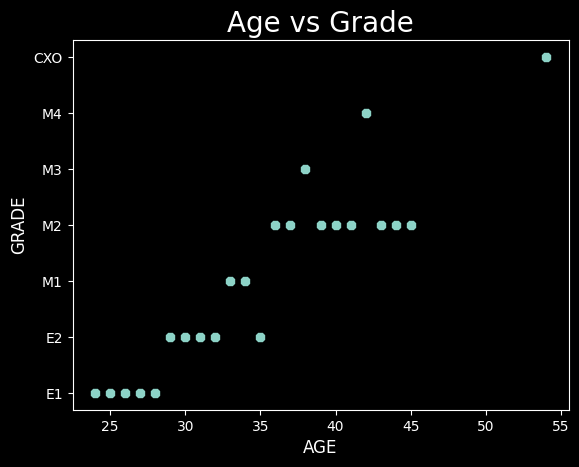

In [22]:
fig, ax = plt.subplots()
ax.set_title("Age vs Grade", fontsize=20)
ax.set_xlabel("AGE", fontsize=12)
ax.set_ylabel("GRADE", fontsize=12)

plt.plot(age, gr, '8')
plt.show()

### Inference
*It doesn't take a genius to observe that the **Grade** has a strong correlation with **Age** and therefore, work experience, which inturn results in promotions to better designations and a better salary.

## Last Rating

Now, let us look into some of the other data provided to us, starting with **Last Rating**.

In [23]:
last_rating = [1, 2, 3, 4, 5]
minco = []

for i in last_rating:
    temp = data.loc[data['Last Rating'] == i, 'Monthly Income']
    minco.append(np.mean(temp))

pd.DataFrame(list(zip(last_rating, minco)), columns=['Last Rating', 'Average Monthly Income'])

,Last Rating,Average Monthly Income
0,1,27032.900000
1,2,32764.976471
2,3,35539.452381
3,4,31718.103448
4,5,29310.250000


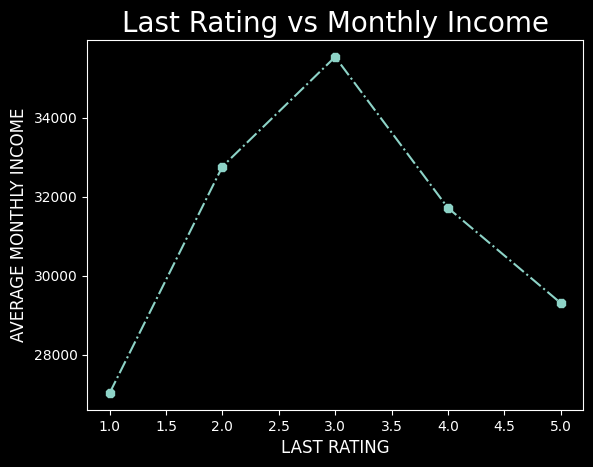

In [24]:
fig, ax = plt.subplots()
ax.set_title("Last Rating vs Monthly Income", fontsize=20)
ax.set_xlabel("LAST RATING", fontsize=12)
ax.set_ylabel("AVERAGE MONTHLY INCOME", fontsize=12)

plt.plot(last_rating, minco, '8-.')
plt.show()

### Inference
* We know that a rating of 1: Poor and 5: Excellent
* This plot seems to imply that those with the last rating of 3 have a higher average income than those with 5.
* We can clearly see that this doesn't make any sense.

### Explanation
* One reason the average income of the people with the last rating of 3 is high, is due to our **"CXO"** outlier, **Mr. ABC197**
* Another reason, could be that the employees with a higher rating are just less likely to leave (especially the ones with a better salary), because they are most probably happy with their job. So this is not a complete representation of all the people working at the company.

Let's try to plot the same graph, but this time, excluding **Mr. ABC197**

In [25]:
minco = []
b_data = data.drop(196)

for i in last_rating:
    temp = b_data.loc[data['Last Rating'] == i, 'Monthly Income']
    minco.append(np.mean(temp))

pd.DataFrame(list(zip(last_rating, minco)), columns=['Age', 'Average Monthly Income'])

,Age,Average Monthly Income
0,1,27032.900000
1,2,32764.976471
2,3,33148.915663
3,4,31718.103448
4,5,29310.250000


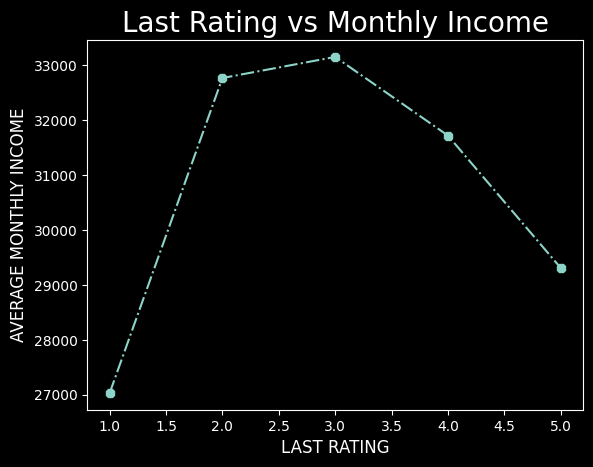

In [26]:
fig, ax = plt.subplots()
ax.set_title("Last Rating vs Monthly Income", fontsize=20)
ax.set_xlabel("LAST RATING", fontsize=12)
ax.set_ylabel("AVERAGE MONTHLY INCOME", fontsize=12)

plt.plot(last_rating, minco, '8-.')
plt.show()

As we can see, it is back to normalcy.

## Regression

Now, let us use regression to further analyse our data.

In [27]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.preprocessing import PolynomialFeatures as PolyReg

Let us define a method to do the necessary linear regression using sklearn and plots it.

In [28]:
def linreg(x, y, deco1):
    reg0 = LinReg()
    reg0.fit(np.array(x).reshape(-1, 1), y)

    c0 = reg0.intercept_
    m0 = reg0.coef_

    plt.plot(x, y, deco1)
    x_plot = np.linspace(1, len(x), 10)
    y_plot = c0 + m0 * x_plot
    plt.plot(x_plot, y_plot)

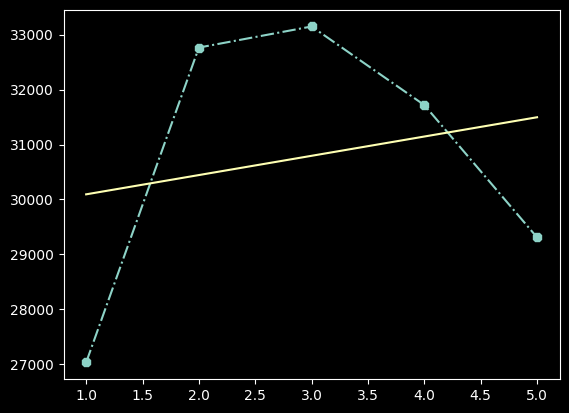

In [29]:
linreg(last_rating, minco, '8-.')

Greatly Underfitted... But, It was not unexpected.
So let us try to use polynomial regression.                                  

Let us define a method that can do the necessary regression and plot it using sklearn.

In [30]:
def pol_reg(deg, g_title, x, x0, x1, x_title, y, y_title, deco1, deco2):
    fig, ax = plt.subplots()
    ax.set_title(g_title, fontsize=20)
    ax.set_xlabel(x_title, fontsize=12)
    ax.set_ylabel(y_title, fontsize=12)

    poly_feat = PolyReg(degree=deg, include_bias=False)
    x_poly = poly_feat.fit_transform(np.array(x).reshape(-1, 1))

    reg = LinReg()
    reg.fit(x_poly, y)

    c = reg.intercept_
    co = []
    for i in range(0, deg):
        co.append(reg.coef_[i])

    plt.plot(x, y, deco1)
    x_plot = np.linspace(x0, x1, 250)
    y_plot = []

    for i in x_plot:
        temp = c
        k = 1
        for j in range(0, deg):
            temp += co[j] * pow(i, k)
            k += 1
        y_plot.append(temp)

    plt.plot(x_plot, y_plot, deco2)
    plt.show()

Now, let us plot the graphs between **Last Rating** and **Average Monthly Income** for various degrees and find the optimal degree.

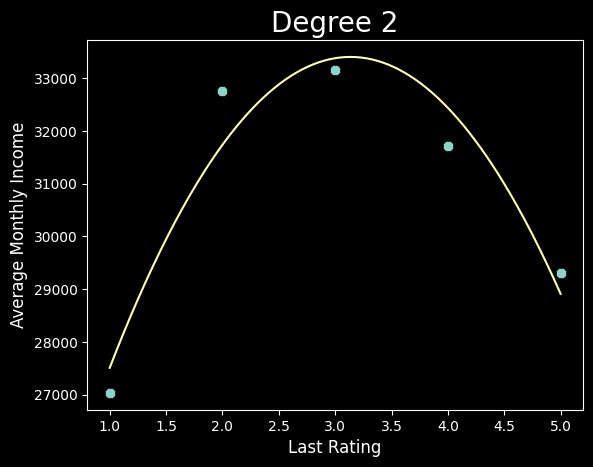

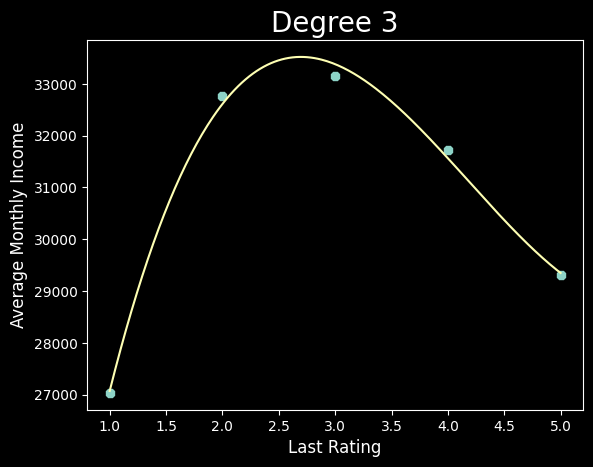

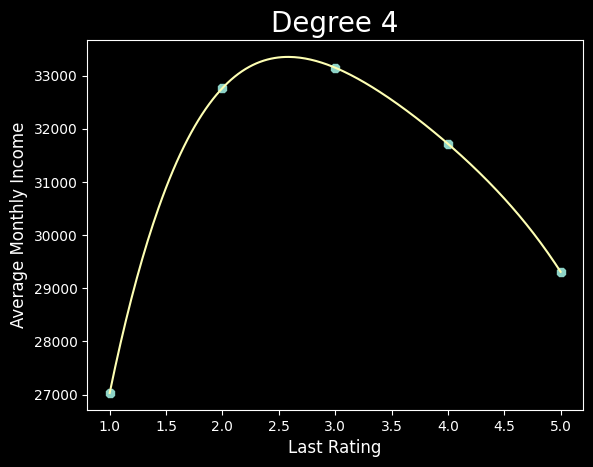

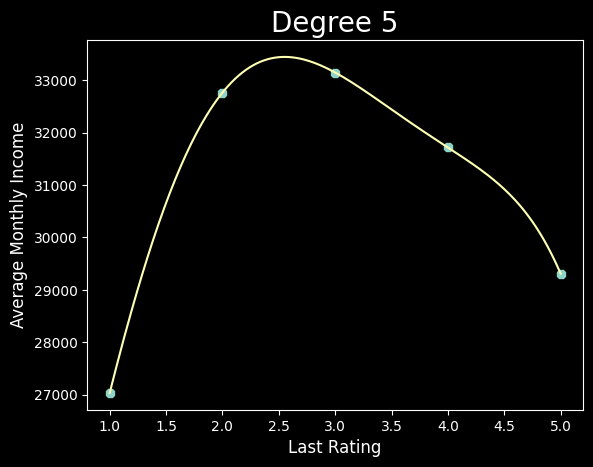

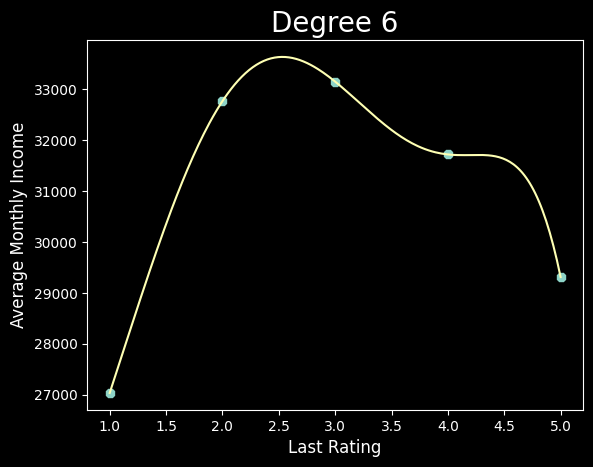

In [31]:
for i in range(2, 7):
    pol_reg(i, f'Degree {i}', last_rating, last_rating[0], last_rating[-1], 'Last Rating', minco,
            'Average Monthly Income', '8', '')

As we can see, Degree 4 seems to be a good choice.

Now, let us do the same, but with **Age** instead of **Last Rating**.<br>
Note: We will be excluding **Mr. ABC197**.

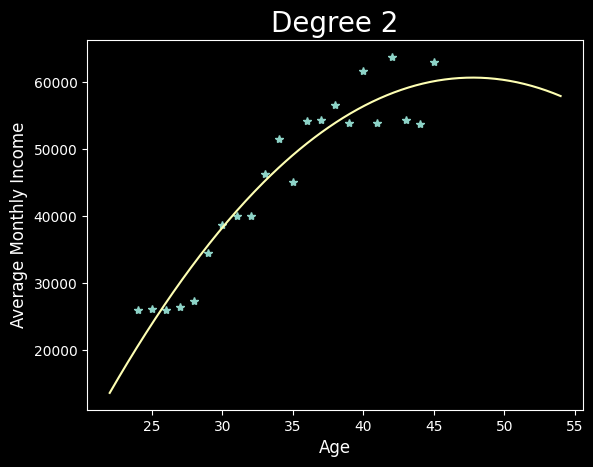

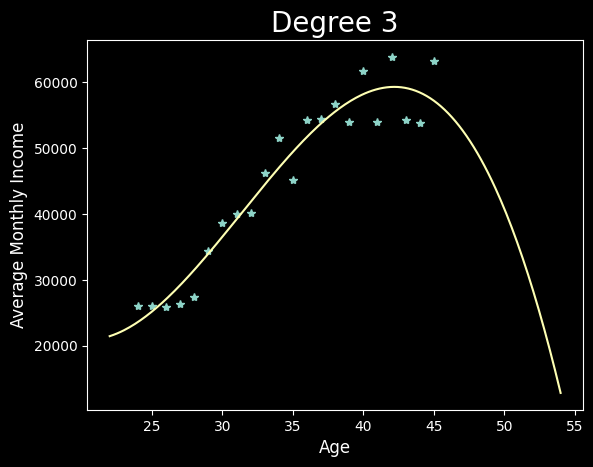

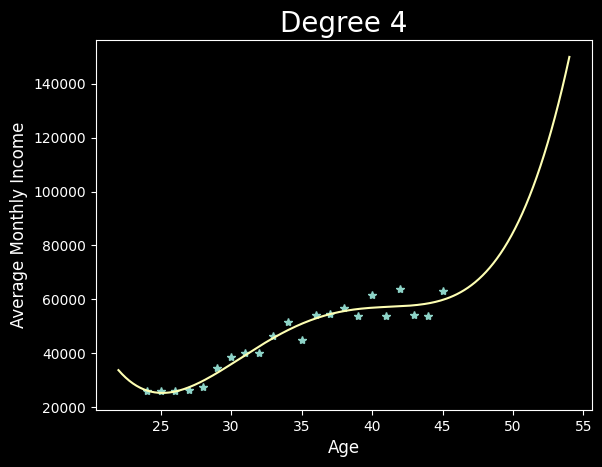

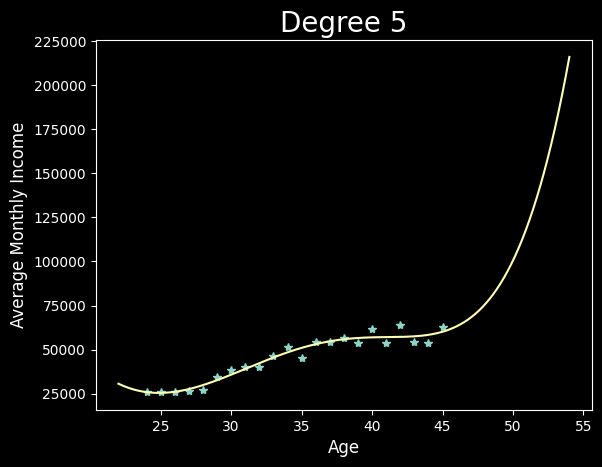

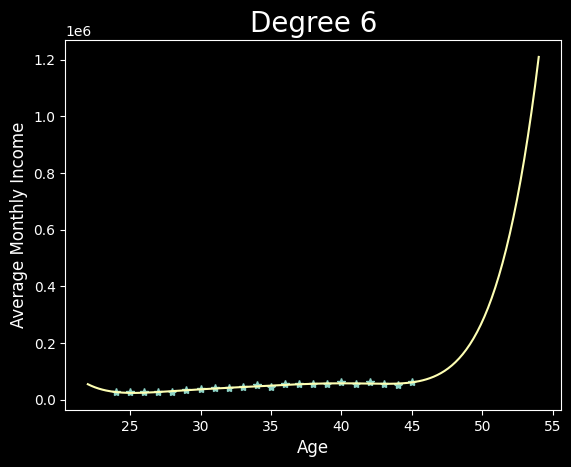

In [32]:
for i in range(2, 7):
    pol_reg(i, f'Degree {i}', cp_age, sorted(age)[0] - 2, sorted(age)[-1], 'Age', cp_minco0, 'Average Monthly Income',
            '*', '')

In this case, we can say that Degree 5, seems to be the best fit.<br>
Interestingly, according to this particular plot, the **Average Monthly Income** at Age 54 is close to the **Monthly Income** of Mr. ABC197 who is also 54 years old.

Welp, I guess I can not think of any more of these graphs... So
## Thank You.